<a href="https://colab.research.google.com/github/SharonneKemboi/Customer-Segmentation-Analysis/blob/master/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation Analysis using KMeans Clustering**

# SHARON KEMBOI


**DATA SCIENCE ASSIGNMENT**

Task 3: Customer Segmentation

Use a customer dataset to group customers into different segments based on their
purchasing behavior. Apply clustering techniques like KMeans to identify patterns
and describe the characteristics of each segment. Preprocess the data, perform
clustering, and visualize the results.

In this notebook I will demonstrates customer segmentation based on purchasing behavior

#1. IMPORTING THE DEPENDENCIES

In [2]:
# Data handling
import pandas as pd   # For working with dataframes (structured data)
import numpy as np    # For numerical operations (arrays, math functions)

# Data Visualization
import matplotlib.pyplot as plt   # For static plots
import seaborn as sns             # For advanced statistical visualization
import plotly.express as px       # For interactive visualizations
import missingno as msno          # For missing value visualization

# Machine Learning
from sklearn.cluster import KMeans         # For clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling & encoding
from sklearn.decomposition import PCA      # Dimensionality reduction (if needed)
from sklearn.metrics import silhouette_score  # Model evaluation metric

# Other
import warnings
warnings.filterwarnings('ignore')   # Ignore warnings for clean output

# Set global visualization style for consistency
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12



#2. DATA COLLECTION AND ANALYSIS

2.1 **LOADING DATA**

In [4]:
#Loading the dataset from csv to a pandas dataframe
df = pd.read_csv("/content/Mall_Customers.csv")

2.2 first five rows

In [35]:
#first five rows in the dataframe
# Styled preview
df.head().style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#fffff'),
                                  ('color', 'white'),
                                  ('font-weight', 'bold')]}]
).set_properties(**{'border': '1px solid black', 'padding': '6px'})


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 2.3 Dataset shape

In [5]:
print("Data shape:", df.shape)#finding the number of rows and columns

Data shape: (200, 5)


# 3. Exploratory Data Analysis (EDA)

3.1 Dataset Info

In [6]:
#getting some Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


3.2 Summary Statistics

In [7]:
# 3.2 Summary Statistics
data_summary = df.describe().T.style.background_gradient(cmap="Greys")
data_summary

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual Income (k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


3.3 Missing Values Check

In [8]:
# Missing Values Check
print("\nMissing values:\n", df.isnull().sum())

# Remove missing values (if any)
df = df.dropna()
print("Shape after dropping missing values:", df.shape)




Missing values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Shape after dropping missing values: (200, 5)


3.4 Univariate Analysis - Distributions

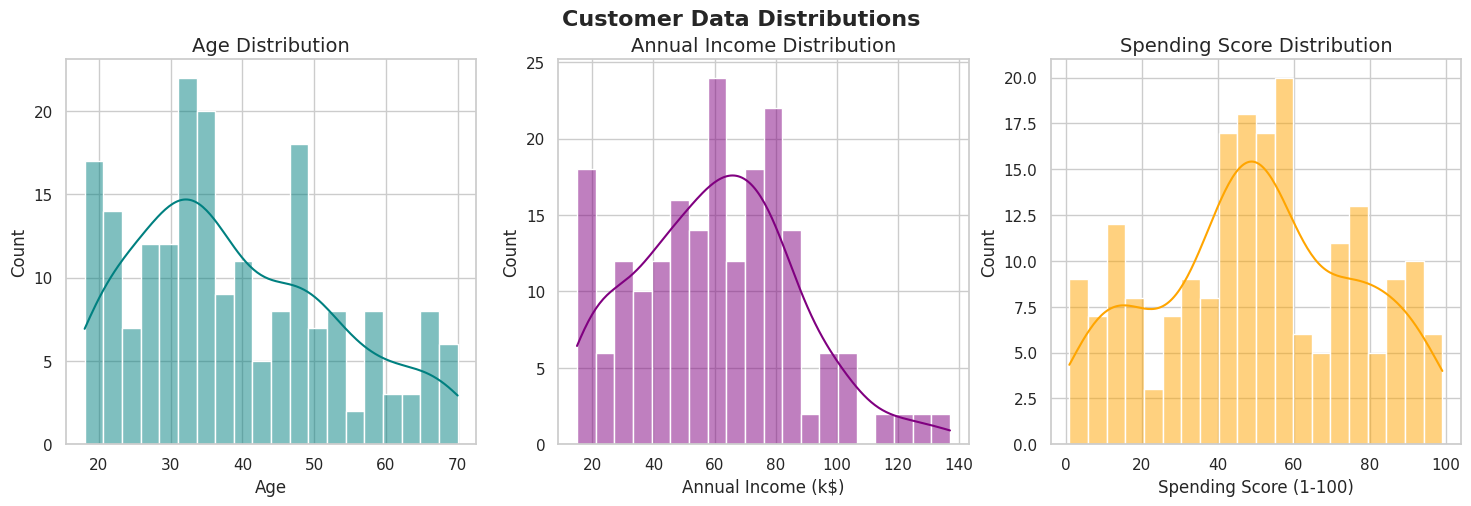

In [9]:
# Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], bins=20, kde=True, color="teal", ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color="purple", ax=axes[1])
axes[1].set_title("Annual Income Distribution")

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color="orange", ax=axes[2])
axes[2].set_title("Spending Score Distribution")

plt.suptitle("Customer Data Distributions", fontsize=16, weight="bold")
plt.show()

3.5 Correlation Analysis

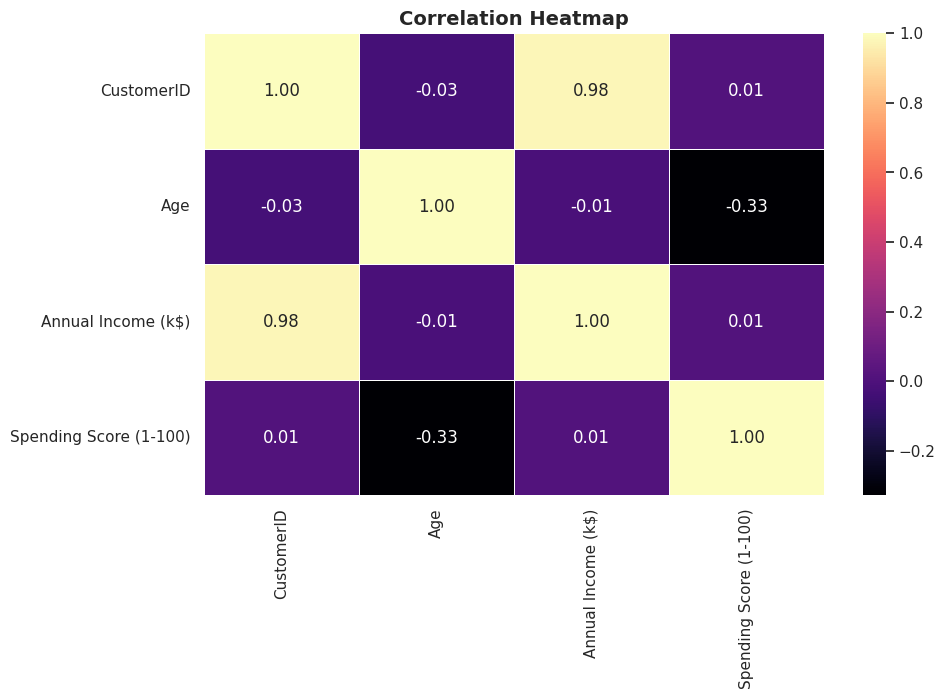

In [10]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="magma", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14, weight="bold")
plt.show()


# 4. Feature Selection & Scaling

In [11]:
# For clustering, we select Income & Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [12]:
# Scale features for KMeans (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Finding Optimal k

5.1 Elbow Method

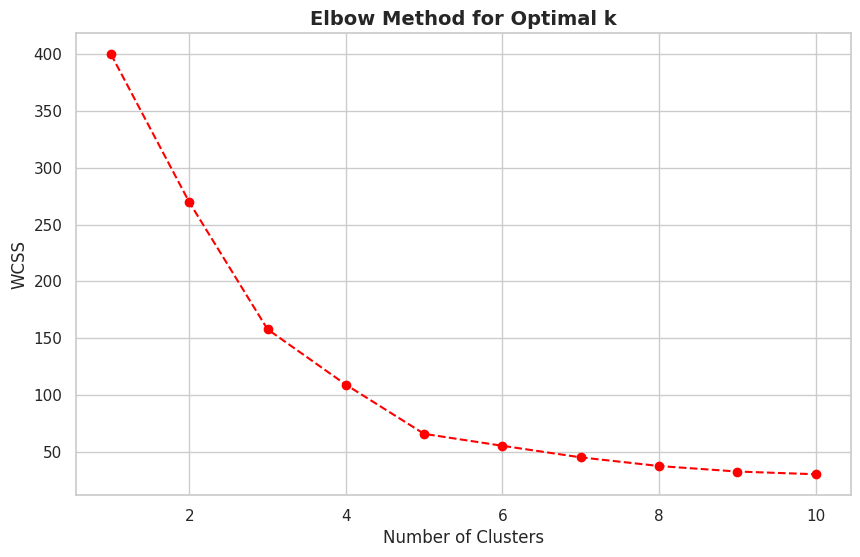

In [13]:
# Elbow & Silhouette Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.title("Elbow Method for Optimal k", fontsize=14, weight="bold")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

 5.2 Silhouette Scores

In [14]:
# Silhouette Scores
for k in range(2, 7):
    preds = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=2: 0.321
Silhouette Score for k=3: 0.467
Silhouette Score for k=4: 0.494
Silhouette Score for k=5: 0.555
Silhouette Score for k=6: 0.540


# 6. K-Means Clustering

In [18]:
# 6. K-Means Clustering (k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Inverse-transform cluster centers to original scale
centers = scaler.inverse_transform(kmeans.cluster_centers_)



7. Visualizing Clusters

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

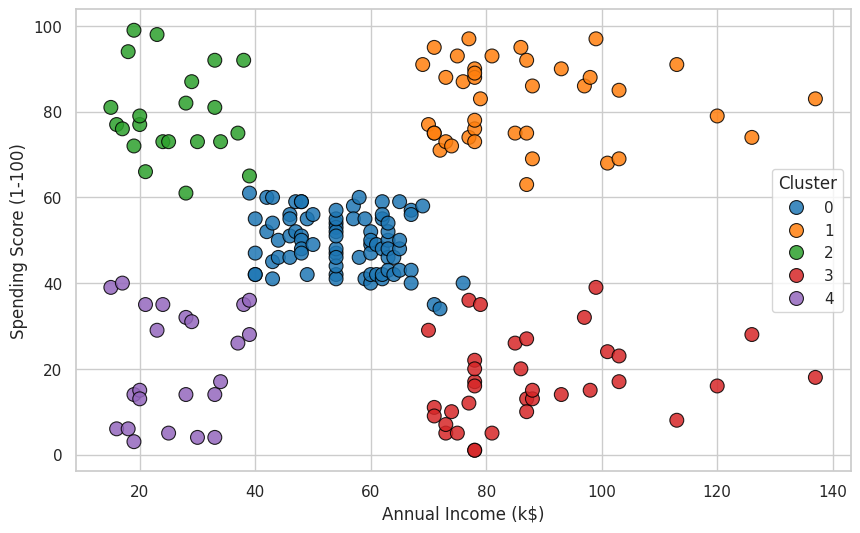

In [16]:

# Lets Visualize the Clusters
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette="tab10", s=100, edgecolor="black", alpha=0.85)

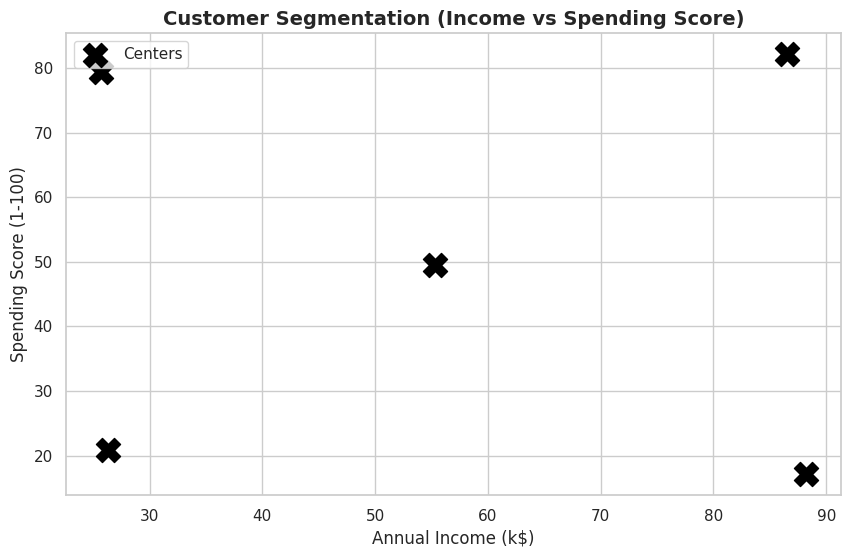

In [17]:
# Cluster centers
plt.scatter(centers[:,0], centers[:,1], c='black', s=300, marker='X', label="Centers")

plt.title("Customer Segmentation (Income vs Spending Score)", fontsize=14, weight="bold")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


8. Cluster Profiles

In [20]:
# 8. Cluster Profiles
cluster_profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

cluster_profile.style.background_gradient(cmap="YlGnBu").set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#fffff'),
                                  ('color', 'white'),
                                  ('font-weight', 'bold')]}]
)


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


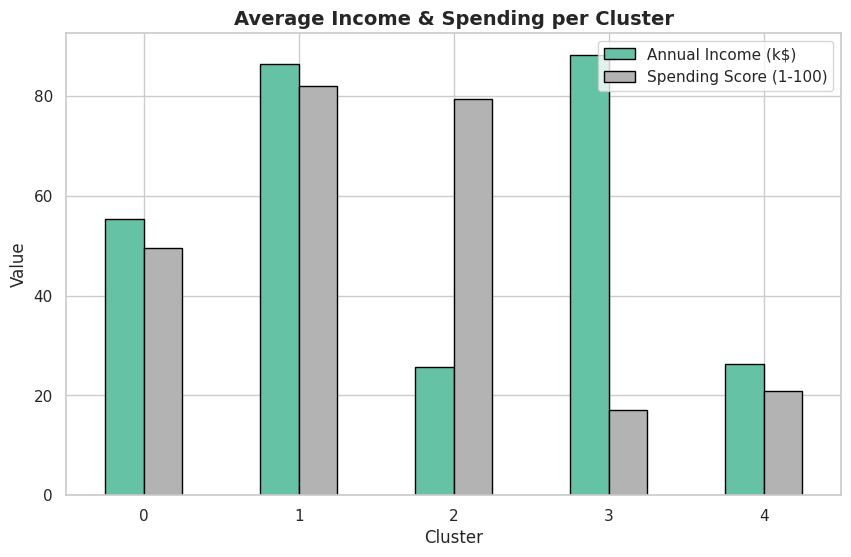

In [21]:
# Bar Chart Profile
cluster_profile.plot(kind="bar", figsize=(10,6), colormap="Set2", edgecolor="black")
plt.title("Average Income & Spending per Cluster", fontsize=14, weight="bold")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.show()


 9. Pairplot Exploration

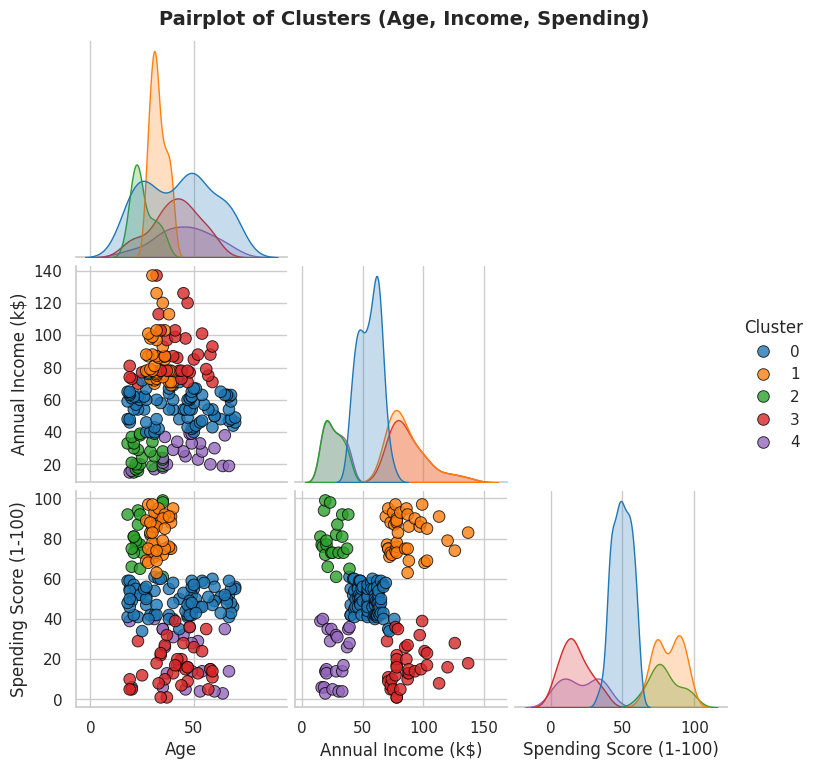

In [22]:
#Pairplot for Cluster Exploration
# Selecting variables for pairplot
plot_data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]

# Pairplot colored by cluster
sns.pairplot(plot_data,
             hue="Cluster",
             palette="tab10",
             diag_kind="kde",
             corner=True,
             plot_kws={'alpha':0.8, 's':70, 'edgecolor':'black'})

plt.suptitle("Pairplot of Clusters (Age, Income, Spending)", fontsize=14, weight="bold", y=1.02)
plt.show()


10. Summary

In [23]:
# Computing cluster summary
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)


In [24]:
# Add size of each cluster
cluster_summary['Count'] = df['Cluster'].value_counts().sort_index().values


In [25]:
# Interpret clusters based on patterns
insights = []
for i, row in cluster_summary.iterrows():
    if row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] > 60:
        insights.append("High Income, High Spending → Premium Customers ")
    elif row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] < 40:
        insights.append("High Income, Low Spending → Upsell Opportunity ")
    elif row['Annual Income (k$)'] < 40 and row['Spending Score (1-100)'] > 60:
        insights.append("Low Income, High Spending → Budget Loyalists ")
    elif row['Annual Income (k$)'] < 40 and row['Spending Score (1-100)'] < 40:
        insights.append("Low Income, Low Spending → Not Engaged ")
    else:
        insights.append("Middle Class, Moderate Spending → Growth Segment ")

In [27]:
# Adding insights to summary
cluster_summary['Segment Insight'] = insights

# Styling table
cluster_summary.style.background_gradient(cmap="YlGnBu").set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#FFFFF'),
                                  ('color', 'white'),
                                  ('font-weight', 'bold')]}]
).set_properties(**{'border': '1px solid black', 'padding': '6px'})

,Age,Annual Income (k$),Spending Score (1-100),Count,Segment Insight
Cluster,,,,,
0,42.700000,55.300000,49.500000,81,"Middle Class, Moderate Spending → Growth Segment"
1,32.700000,86.500000,82.100000,39,"High Income, High Spending → Premium Customers"
2,25.300000,25.700000,79.400000,22,"Low Income, High Spending → Budget Loyalists"
3,41.100000,88.200000,17.100000,35,"High Income, Low Spending → Upsell Opportunity"
4,45.200000,26.300000,20.900000,23,"Low Income, Low Spending → Not Engaged"




11. Conclusion



 # **PROJECT** **CONCLUSION**:

I managed to successfully apply K-Means clustering to segment mall customers based on Annual Income and Spending Score.

I Identified 5 distinct customer groups:
   - Premium Customers  (High Income, High Spending)
   - Upsell Opportunities  (High Income, Low Spending)
   - Budget Loyalists  (Low Income, High Spending)
   - Not Engaged  (Low Income, Low Spending)
   - Growth Segment  (Middle Class, Moderate Spending)

This project shows how unsupervised learning can transform raw customer data into actionable business intelligence.

